In [437]:
import pandas as pd
import matplotlib as plt
import csv
import numpy as np

In [438]:
# load data
bias_df = pd.read_csv('word_count_bias.csv', nrows=49, delimiter=';')
bias_df.head

reliable_df = pd.read_csv('word_count_reliable.csv', nrows=49, delimiter=';')
reliable_df.head

total_df = pd.read_csv('word_count_total.csv', nrows=1000, delimiter=';')

df_trustworthy = pd.read_csv('word_count_reliable_total.csv', delimiter=';')
df_fake = pd.read_csv('word_count_fake_total.csv', delimiter=';')



In [439]:
# Drop label collumn
df = bias_df.drop(['label'], axis=1)
df.head

df_r = reliable_df.drop(['label'], axis=1)

df_t = total_df.drop(['label'], axis=1)

In [440]:
df['log_base2'] = np.log2(df['count'])


<Axes: xlabel='word'>

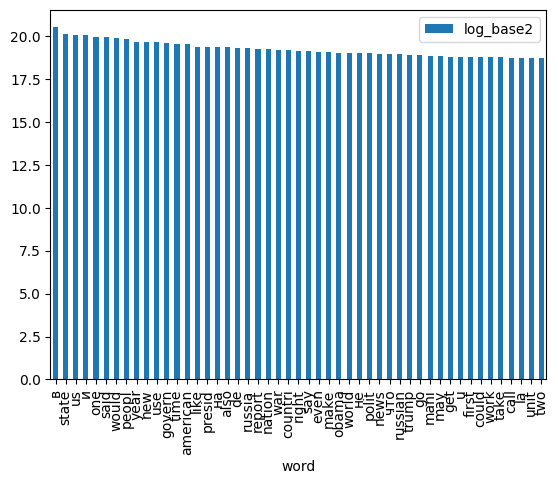

In [441]:
df.plot.bar(x='word', y='log_base2', rot=90)

<Axes: xlabel='word'>

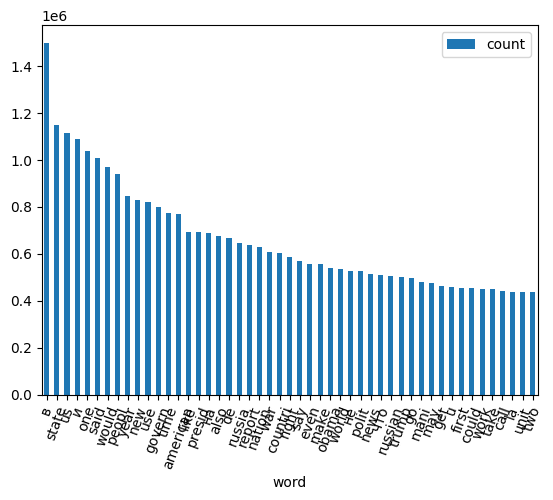

In [442]:
df.plot.bar(x='word', y='count', rot=70)

<Axes: xlabel='word'>

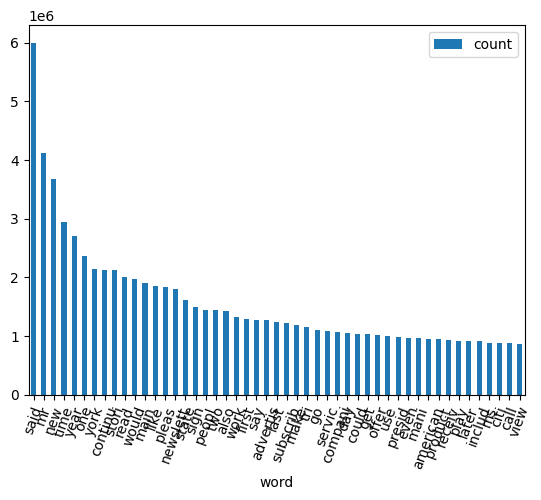

In [443]:
df_r.plot.bar(x='word', y='count', rot=70)

<Axes: xlabel='word'>

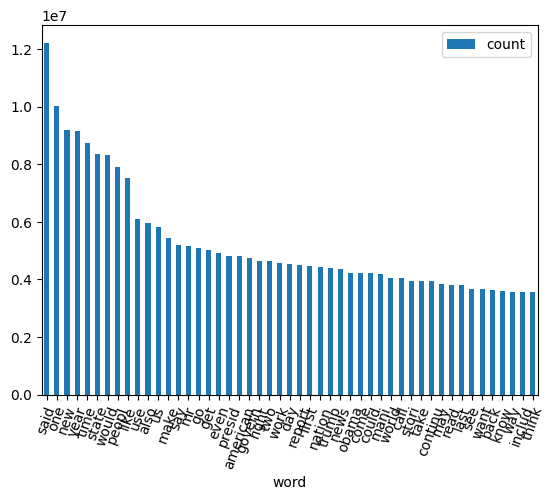

In [444]:
df_t.iloc[0:49].plot.bar(x='word', y='count', rot=70)

In [445]:

def label_word_count_collumn(label_df, total_df, collumn_name:str):
    word_count_list = label_df['count'].values.tolist()

    total_df[collumn_name] = 0

    for i in range(len(total_df)):
        w = total_df['word'][i]
        for x in range(len(label_df)):
            if w == label_df['word'][x]:
                total_df.loc[i, collumn_name] = word_count_list[x]
                break   

label_word_count_collumn(df_r, df_t, 'reliable_word_count')
label_word_count_collumn(bias_df, df_t, 'bias_word_count')

label_word_count_collumn(df_trustworthy, df_t, 'trustworthy_word_count')
label_word_count_collumn(df_fake, df_t, 'fake_word_count')





<Axes: xlabel='word'>

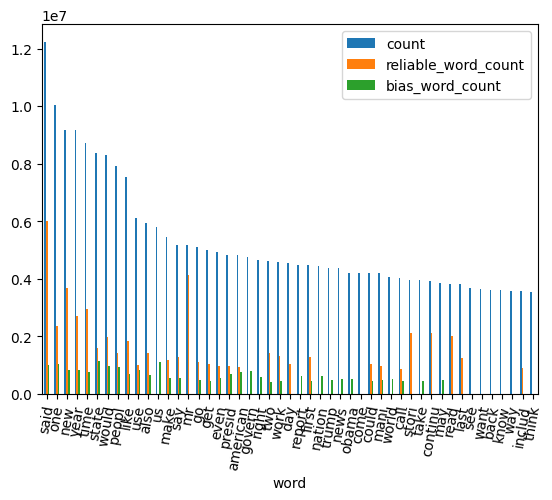

In [446]:
df_t.iloc[0:49].plot(x='word', y=['count', 'reliable_word_count', 'bias_word_count'],kind="bar" ,rot=80)

<Axes: xlabel='word'>

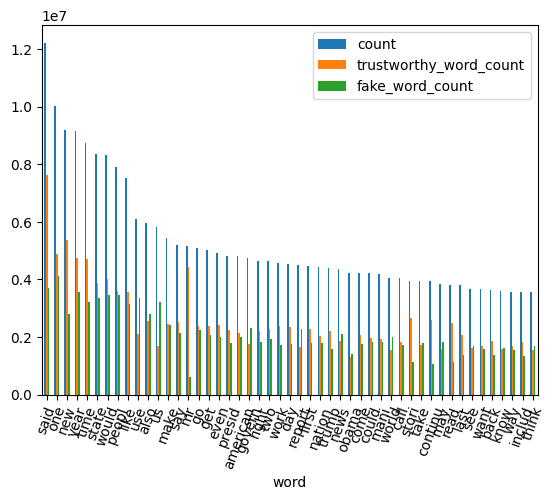

In [447]:
# Plot fake vs. trustworthy
df_t.iloc[0:49].plot(x='word', y=['count', 'trustworthy_word_count', 'fake_word_count'],kind="bar" ,rot=70)

In [448]:
# Calculate the number of unique words i fake
num_trustworthy_words = len(df_trustworthy)
print(num_trustworthy_words)
total_trustworthy_words = df_trustworthy['count'].sum()
print(total_trustworthy_words)

num_fake_words = len(df_fake)
print(num_fake_words)
total_fake_words = df_fake['count'].sum()
print(total_fake_words)

# Normalize the count
df_t['trustworthy_word_count'] = df_t['trustworthy_word_count'] / total_trustworthy_words
print(df_t['trustworthy_word_count'][0:10])


df_t['fake_word_count'] = df_t['fake_word_count'] / total_fake_words
print(df_t['fake_word_count'][0:10])

1553185
1096550559
3007965
1066851892
0    0.006953
1    0.004464
2    0.004913
3    0.004327
4    0.004290
5    0.003546
6    0.003651
7    0.003268
8    0.003247
9    0.001925
Name: trustworthy_word_count, dtype: float64
0    0.003470
1    0.003851
2    0.002632
3    0.003328
4    0.003017
5    0.003150
6    0.003241
7    0.003257
8    0.002958
9    0.003147
Name: fake_word_count, dtype: float64


<Axes: xlabel='word'>

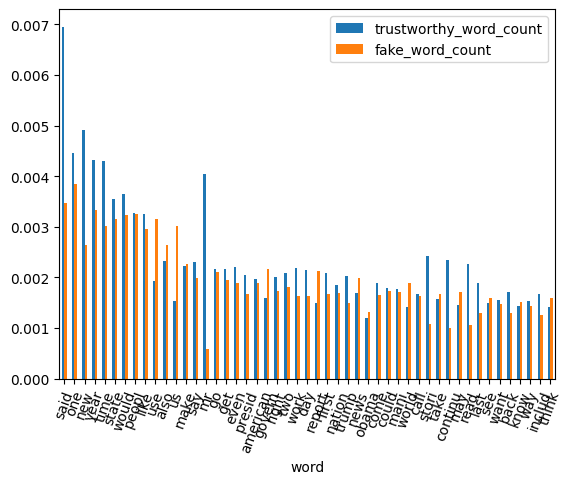

In [449]:
# Plot fake vs. trustworthy normalized frequency of unique words
df_t.iloc[0:49].plot(x='word', y=['trustworthy_word_count', 'fake_word_count'],kind="bar" ,rot=70)

<Axes: xlabel='word'>

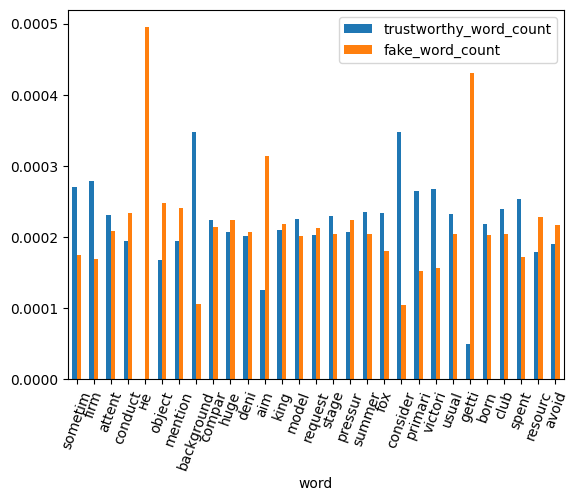

In [451]:
df_t.iloc[970:999].plot(x='word', y=['trustworthy_word_count', 'fake_word_count'],kind="bar" ,rot=70)